#### Elaborado por:
- Priscilla Jiménez Salgado
- Fabián Araya Ortega
- David Acuña López


# Lectura del Dataset

In [148]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Student_Performance.csv")
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Información general del dataset

El dataset que se trabaja corresponde al rendimiento académico de estudiantes. Se analizará la información general mediante estadísticas descriptivas, histogramas, boxplots para observar la distribución de los datos numéricos.

Para obtener primeramente la estructura general del dataset utilizamos df.info(), lo cual retorna un resumen con:
- Número de filas
- Lista de las columnas y el tipo de dato
- Los valores no nulos


In [149]:
# @title
# Ver información general del dataset
print(" Información del dataset:")
df.info()

 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Después de ver la estructura del dataset, usamos df.describe() para obtener un resumen de los números. Esta tabla nos ayuda a entender mejor los datos antes de graficarlos o entrenar un modelo.

- Count (conteo): muestra cuántos valores tiene cada columna. Si el número es menor que el total de filas, significa que hay datos faltantes que tal vez debamos rellenar o eliminar.

- Mean y std (promedio y variación): nos dicen cuál es el valor típico y qué tanto cambian los datos. Si la variación es muy grande, puede que necesitemos normalizar o revisar si hay valores raros.

- Min y Max (mínimo y máximo): permiten ver los límites. Si un valor máximo es demasiado alto comparado con el resto, puede ser un error o un outlier.

- Percentiles (25%, 50% o mediana, y 75%): muestran cómo se reparten los datos. Si la mediana es muy diferente al promedio, significa que los datos están sesgados.

*** En resumen: con esta información podemos decidir si el dataset está limpio o si necesita ajustes (tratar datos faltantes, normalizar valores, o revisar outliers). Es un paso clave para asegurarnos de que el análisis y los modelos que hagamos después sean confiables.


In [150]:
# @title
# Ver estadísticas descriptivas
print("\n Estadísticas descriptivas:")
display(df.describe())


 Estadísticas descriptivas:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Interpretación de las estadísticas descriptivas

- Completitud: todas las variables tienen 10,000 valores → no hay datos faltantes.

- Horas de estudio: la mayoría de estudiantes estudia entre 3 y 7 horas (media≈5, mediana=5). Distribución equilibrada, sin extremos sospechosos.

- Notas previas: valores centrados (media=69, mediana=69), con variación moderada (std≈17). Rango entre 40 y 99 es razonable.

- Horas de sueño: promedio 6.5 horas, mediana=7. La mayoría duerme entre 5 y 8 horas; rango 4–9 normal.

- Prácticas realizadas: promedio 4.5, mediana=5. Algunos estudiantes no hicieron ninguna práctica (min=0), pero el rango 0–9 es válido.

- Índice de rendimiento: media=55, mediana=55, con desviación (std) de ~19. Rango 10–100, dentro de lo esperado.

---
# Análisis de Características

En esta sección realizamos un EDA para entender la forma y relaciones de las variables

## Análisis Exploratorio de Datos: Rendimiento Estudiantil

Para entender cómo los hábitos de los estudiantes se relacionan con su rendimiento, seguimos siempre los mismos pasos con **cada columna numérica** del dataset:

1. ** Ver la distribución**  
   Usamos un histograma (y a veces un boxplot) para observar cómo se reparten los valores:  
   - ¿La mayoría está en un rango medio?  
   - ¿Hay valores extremos o muy raros?

2. ** Revisar outliers (valores atípicos)**  
   Aplicamos el método IQR para detectar si existen estudiantes con datos fuera de lo normal.  
   - Si los hay, los reportamos y pensamos si conviene analizarlos aparte.  
   - Si no, dejamos claro que todos los valores son razonables.

3. ** Comparar con el rendimiento académico**  
   Usamos diagramas de dispersión contra la variable objetivo (*Performance Index*).  
   - Esto nos ayuda a ver si hay una tendencia: por ejemplo, “más horas de estudio → mejor rendimiento”.

4. ** Medir la relación con correlación**  
   Calculamos la correlación de Pearson para poner un número a esa relación.  
   - Valores cercanos a +1 significan relación positiva fuerte.  
   - Valores cercanos a 0 significan poca relación.

---

 **En resumen:**  
Para cada columna → miramos su forma (histograma), buscamos valores raros (outliers), la comparamos con el rendimiento (dispersión) y calculamos la correlación.  
Así entendemos de manera clara cómo cada hábito (estudio, sueño, práctica, etc.) influye en el rendimiento académico.



###  Hours Studied — ¿Cuántas horas estudian los estudiantes al día?

**Qué veremos:**
- **Outliers (IQR):** verificación automática con límites ajustados al rango real (1 a 9 horas).
- **Histograma:** cómo se distribuyen las horas de estudio de los estudiantes (mínimo, máximo y valores más frecuentes).
- **Dispersión vs Performance Index:** cómo se relaciona el tiempo de estudio con el rendimiento académico.

In [151]:
# @title
# %%
# --- Detección de outliers por IQR con límites ajustados a los datos ---
import numpy as np

col = "Hours Studied"
x = df[col].astype(float)

# Cuartiles e IQR
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Ajustamos límites a los valores observados en el dataset
lower_adj = max(lower, x.min())
upper_adj = min(upper, x.max())

# Máscara y valores de outliers con límites ajustados
outlier_mask = (x < lower_adj) | (x > upper_adj)
outliers_values = x[outlier_mask].sort_values().unique()

# --- Salida descriptiva ---
print(f" Análisis de outliers para la variable '{col}'")
print("-"*65)
print(f" 25% de los estudiantes estudian ≤ {Q1:.2f} horas (Q1).")
print(f" 75% de los estudiantes estudian ≤ {Q3:.2f} horas (Q3).")
print(f" Rango intercuartílico (IQR): {IQR:.2f} horas.")
print("   ➜ Esto mide la 'anchura' de la parte central de los datos.")
print()
print(f" Umbral teórico inferior (IQR): {lower:.2f} horas")
print(f" Umbral teórico superior (IQR): {upper:.2f} horas")
print(f"   ➜ Ajustado al rango real de la variable: [{lower_adj:.2f}, {upper_adj:.2f}]")
print()

n_out = outlier_mask.sum()
if n_out == 0:
    print(" No se detectaron outliers en esta variable (ajustada al rango observado).")
else:
    print(f" Se detectaron {n_out} outlier(s).")
    print(f"  Valores atípicos únicos: {list(outliers_values)}")
print("-"*65)


 Análisis de outliers para la variable 'Hours Studied'
-----------------------------------------------------------------
 25% de los estudiantes estudian ≤ 3.00 horas (Q1).
 75% de los estudiantes estudian ≤ 7.00 horas (Q3).
 Rango intercuartílico (IQR): 4.00 horas.
   ➜ Esto mide la 'anchura' de la parte central de los datos.

 Umbral teórico inferior (IQR): -3.00 horas
 Umbral teórico superior (IQR): 13.00 horas
   ➜ Ajustado al rango real de la variable: [1.00, 9.00]

 No se detectaron outliers en esta variable (ajustada al rango observado).
-----------------------------------------------------------------


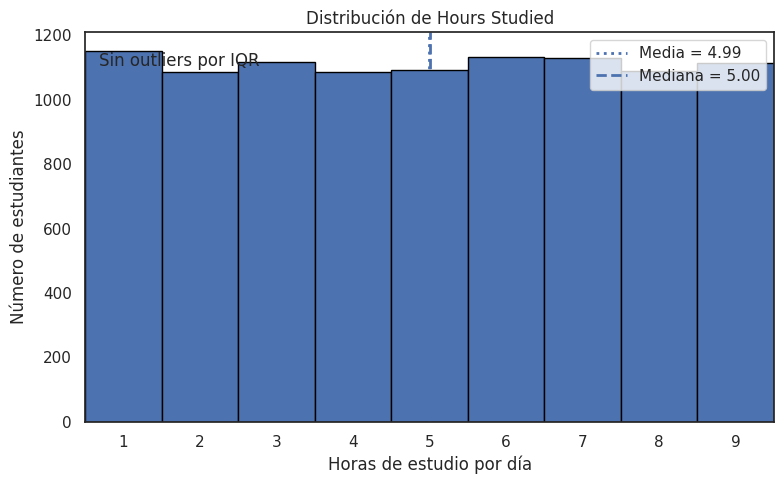

In [152]:
# Histograma Hours Studied con ajustes según describe/info
import numpy as np
col = "Hours Studied"
x = df[col].astype(float)

# Estadísticos una sola vez
mean_, med_ = x.mean(), x.median()

# Bins centrados en enteros 1..9 y ejes fijos
xmin, xmax = int(x.min()), int(x.max())      # 1..9 según tu describe()
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)  # 0.5, 1.5, ..., 9.5

# Outliers por IQR (igual que antes)
Q1, Q3 = x.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
mask_out = (x < lower) | (x > upper)
out_vals = np.sort(x[mask_out].unique())

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Hours Studied")
ax.set_xlabel("Horas de estudio por día")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.set_xlim(xmin - 0.5, xmax + 0.5)

# Media/mediana
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Outliers: solo si existen; si no, lo indicamos en la figura
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={mask_out.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()


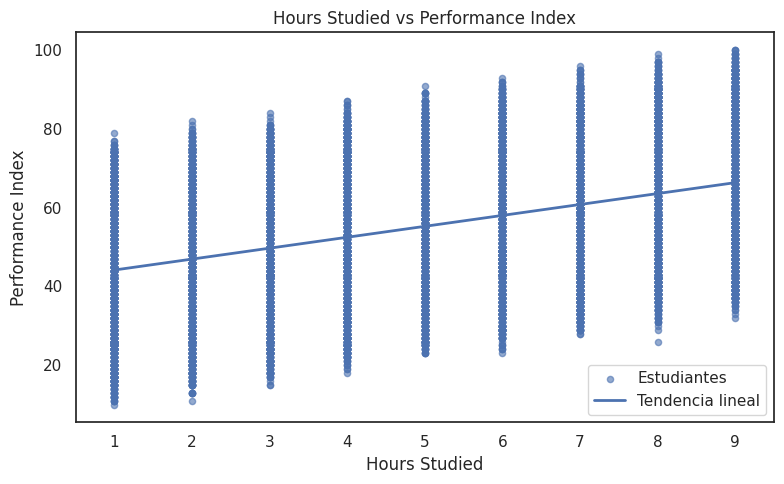

Correlación (Pearson) X-Y: 0.374


In [153]:
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.6, s=20, label="Estudiantes")

# Recta de tendencia
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 100)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# (Si no hay outliers, no marcamos nada; si los hubiera:)
if out_vals.size > 0:
    ax.scatter(x[mask_out], y[mask_out], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Hours Studied vs Performance Index")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.set_xlim(xmin - 0.5, xmax + 0.5)
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"Correlación (Pearson) X-Y: {np.corrcoef(x, y)[0,1]:.3f}")



####  Distribución de horas de estudio
El histograma nos muestra **cuántos estudiantes estudian cierta cantidad de horas al día**.  
Las barras se ven bastante parejas entre 1 y 9 horas, lo que significa que hay estudiantes en todos los niveles de dedicación.  

 La **media** (promedio) es de ~5 horas y la **mediana** (el valor del medio) también está en 5 horas.  
Esto quiere decir que la mayoría de los estudiantes suelen estudiar alrededor de 5 horas al día.  

---

####  Outliers (valores atípicos)
Con el método **IQR** revisamos si había estudiantes que estudiaban *muchísimo menos* o *muchísimo más* que los demás.  
El cálculo dio límites de **−3 y 13 horas**, pero como en la realidad los datos solo van de **1 a 9 horas**, **no hay valores atípicos**.  

 Conclusión: todos los estudiantes están dentro de un rango normal de estudio.

---

####  Relación con el rendimiento (*Performance Index*)
En el diagrama de dispersión, cada puntito es un estudiante:  
- El eje X son las **horas de estudio**.  
- El eje Y es el **rendimiento académico**.  

Se observa una **tendencia ascendente**:  
- A más horas de estudio, suele aumentar el rendimiento.  
- La correlación de Pearson es **0.37**, lo que indica una relación **positiva pero moderada**.  

Esto significa que **estudiar más ayuda**, pero no es el único factor que influye en las notas. Otros hábitos también cuentan (como dormir bien o practicar con exámenes).

---

 **Resumen sencillo**:  
- La mayoría estudia entre 1 y 9 horas, con un promedio de 5.  
- No hay valores extremos raros.  
- Estudiar más horas generalmente mejora el rendimiento, aunque no lo explica todo.


###   Previous Scores — Calificaciones anteriores de los estudiantes

**Qué veremos:**
- **Histograma:** cómo se reparten las calificaciones previas (bajo/medio/alto).
- **Outliers (IQR):** detección automática con límites ajustados al rango real.
- **Dispersión vs Performance Index:** cómo se relaciona la nota previa con el rendimiento actual.


In [154]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
def iqr_outliers_report(series: pd.Series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores realmente observados (evita límites “imposibles”)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f" Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


 Outliers IQR en 'Previous Scores':
Q1=54.00, Q3=85.00, IQR=31.00
Umbrales teóricos: [7.50, 131.50]
Umbrales ajustados al rango observado: [40.00, 99.00]
✅ No se detectaron outliers con IQR (ajustado).


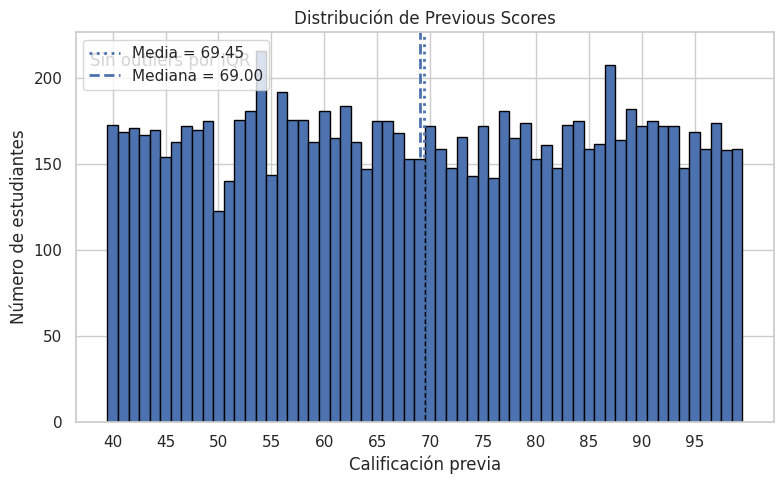

In [155]:
# %%
# ---------- Histograma de Previous Scores con media/mediana y outliers ----------
sns.set(style="whitegrid")

col = "Previous Scores"
x = df[col].astype(float)

# Detección IQR (ajustada)
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

# Bins centrados en enteros (40..99 para tu dataset real)
xmin, xmax = int(x.min()), int(x.max())
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Previous Scores")
ax.set_xlabel("Calificación previa")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1, 5))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


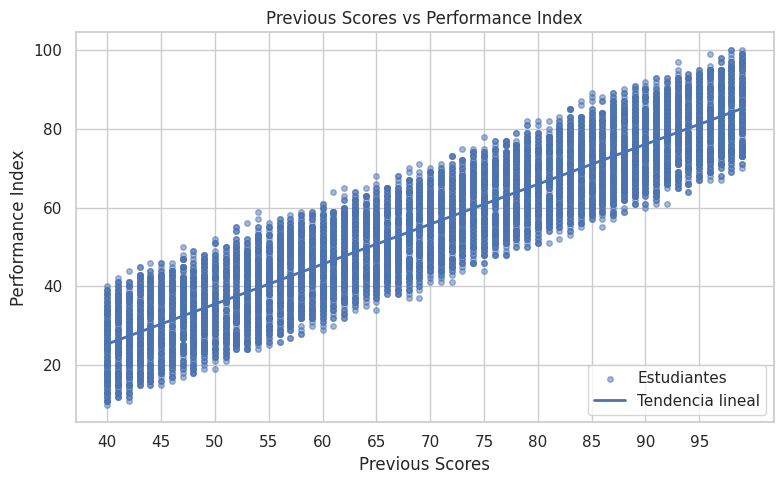

Correlación (Pearson) Previous Scores vs Performance Index: 0.915


In [156]:
# %%
# ---------- Dispersión: Previous Scores vs Performance Index ----------
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.5, s=16, label="Estudiantes")

# Recta de tendencia (ajuste lineal)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 200)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# Resaltar outliers en el scatter (si existen)
if out_vals.size > 0:
    ax.scatter(x[out_mask], y[out_mask], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Previous Scores vs Performance Index")
ax.set_xlabel("Previous Scores")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1, 5))
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Correlación de apoyo
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlación (Pearson) Previous Scores vs Performance Index: {corr:.3f}")



####  Distribución
El histograma muestra cómo se reparten las calificaciones previas.  
La mayoría de los estudiantes están en un rango **medio-alto (60 a 80 puntos)**.  
También hay varios estudiantes con la nota máxima **100**, lo cual refleja un muy buen desempeño.  

 ** Usando el método IQR confirmamos que **no hay valores atípicos** fuera del rango real de 40 a 99.

---

####  Relación con el rendimiento
En el gráfico de dispersión, cada punto representa a un estudiante:  
- En el eje X su **nota previa**.  
- En el eje Y su **rendimiento actual**.  

Se ve una **tendencia ascendente muy clara**:  
- Los que tenían notas altas antes, ahora también suelen rendir mejor.  
- Los que tenían notas más bajas tienden a obtener resultados más bajos.  

 La correlación es **0.91**, lo que indica una **relación muy fuerte**:  
las calificaciones pasadas son un **excelente predictor** del rendimiento actual.

---

 **Resumen sencillo:**  
Las notas previas se concentran entre 60 y 80 puntos, no hay valores extraños,  
y se relacionan fuertemente con el rendimiento actual:  
 **quien fue buen estudiante antes, lo sigue siendo ahora**.


###  Sleep Hours — Horas de sueño por noche
**Qué veremos:**
- **Histograma:** cómo se distribuyen las horas de sueño (mínimo, máximo y valores frecuentes).
- **Outliers (IQR):** detección automática con límites ajustados al rango real (en tu dataset va de 4 a 9 horas).
- **Dispersión vs Performance Index:** cómo se relaciona el sueño con el rendimiento académico.
-  **Boxplot:** cómo cambia el rendimiento según cada cantidad de horas de sueño.


In [157]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
def iqr_outliers_report(series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores observados (evita límites irreales)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f"  Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


  Outliers IQR en 'Sleep Hours':
Q1=5.00, Q3=8.00, IQR=3.00
Umbrales teóricos: [0.50, 12.50]
Umbrales ajustados al rango observado: [4.00, 9.00]
✅ No se detectaron outliers con IQR (ajustado).


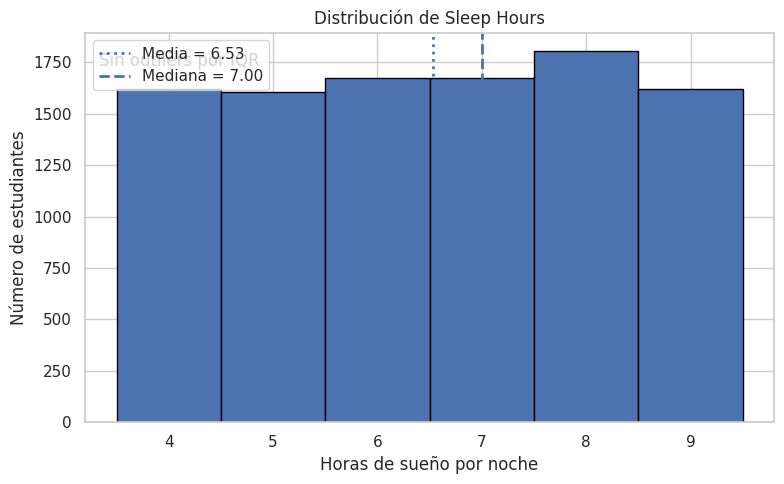

In [158]:
# %%
# ---------- Histograma de Sleep Hours con media/mediana y outliers ----------
sns.set(style="whitegrid")

col = "Sleep Hours"
x = df[col].astype(float)

# Detección IQR (ajustada)
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

# Bins centrados en enteros (en tu dataset: 4..9)
xmin, xmax = int(x.min()), int(x.max())
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Sleep Hours")
ax.set_xlabel("Horas de sueño por noche")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


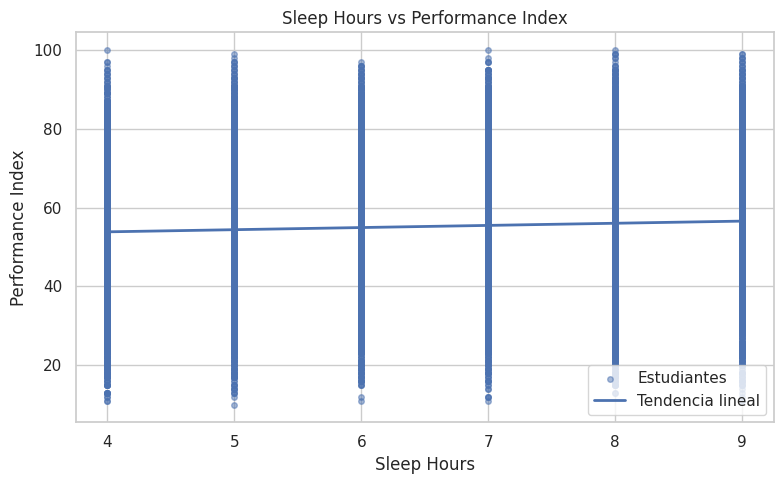

Correlación (Pearson) Sleep Hours vs Performance Index: 0.048


In [159]:
# %%
# ---------- Dispersión: Sleep Hours vs Performance Index ----------
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.5, s=16, label="Estudiantes")

# Recta de tendencia (ajuste lineal)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 200)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# Resaltar outliers en el scatter (si existen)
if out_vals.size > 0:
    ax.scatter(x[out_mask], y[out_mask], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Sleep Hours vs Performance Index")
ax.set_xlabel("Sleep Hours")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Correlación de apoyo (positiva pero suele ser más débil que 'Hours Studied' o 'Previous Scores')
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlación (Pearson) Sleep Hours vs Performance Index: {corr:.3f}")


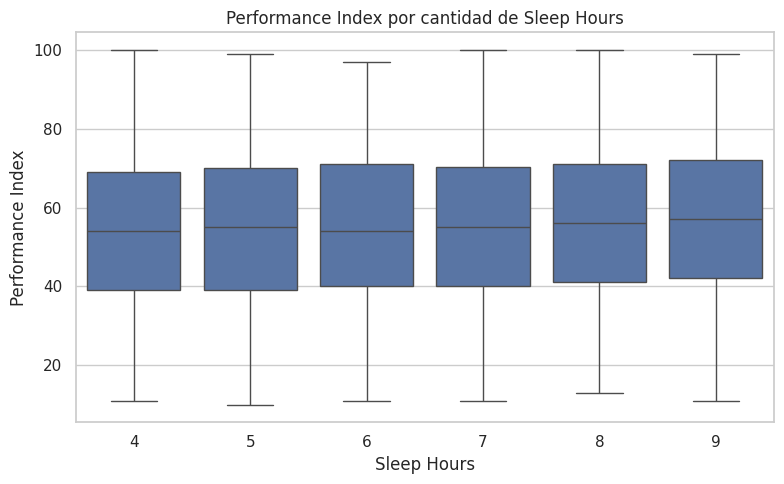

In [160]:
# %%
# ----------  Boxplot: rendimiento por cada cantidad de horas de sueño ----------
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=df[col].astype(int), y=y, ax=ax)
ax.set_title("Performance Index por cantidad de Sleep Hours")
ax.set_xlabel("Sleep Hours")
ax.set_ylabel("Performance Index")
plt.tight_layout()
plt.show()



####  Distribución
- El histograma muestra que la mayoría duerme entre **6 y 9 horas**.
- La **mediana ≈ 7 h** y la **media ≈ 6.5 h** → muchos estudiantes duermen lo “recomendado”.
- Rango observado: **4 a 9 horas**.

####  Outliers (IQR)
- Con **Q1 = 5 h** y **Q3 = 8 h** (IQR = 3 h), los límites teóricos serían 0.5 y 12.5 h,
  pero ajustando al rango real **[4, 9]** se concluye:
-  **No se detectaron outliers** (no hay valores raros de sueño).

####  Relación con el rendimiento
- En el diagrama de dispersión se ve una **tendencia muy suave**: dormir más se asocia
  con un poquito mejor rendimiento.
- **Correlación ≈ 0.05** → relación **positiva pero muy débil**.
- Traducción para peques: **dormir suficiente ayuda**, pero **no es el factor principal** de la nota.

####  Boxplot por cantidad de horas
- Los boxplots de 4, 5, 6, 7, 8 y 9 h muestran **mucho solapamiento**.
- Hay un **ligero aumento** de la mediana del rendimiento al pasar de 6→9 h,
  pero existe **gran variabilidad** en todos los grupos.

####  Resumen sencillo
- No hay valores extraños; la mayoría duerme entre 6–9 h (mediana 7).
- Dormir bien es bueno, pero **estudiar y practicar** parecen influir bastante más en el rendimiento.


### 📑 Sample Question Papers Practiced — Pruebas de práctica realizadas
**Qué veremos:**
- **Histograma:** cuántas pruebas de práctica resolvió cada estudiante (0–9).
- **Outliers (IQR):** verificación automática con límites ajustados al rango real.
- **Dispersión vs Performance Index:** relación entre práctica y rendimiento.
- **Boxplot:** rendimiento según cantidad de prácticas.


In [161]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
import numpy as np
import pandas as pd

def iqr_outliers_report(series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores observados (evita límites irreales)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f" Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


 Outliers IQR en 'Sample Question Papers Practiced':
Q1=2.00, Q3=7.00, IQR=5.00
Umbrales teóricos: [-5.50, 14.50]
Umbrales ajustados al rango observado: [0.00, 9.00]
✅ No se detectaron outliers con IQR (ajustado).


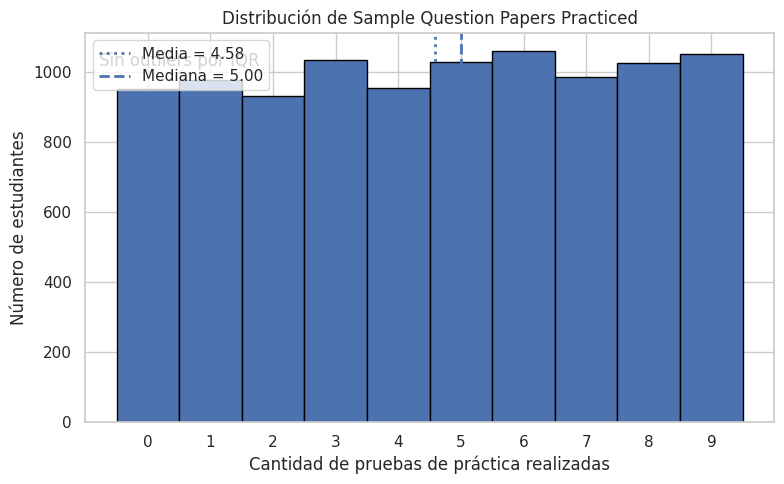

In [162]:
# %%
# ---------- Histograma de Sample Question Papers Practiced ----------
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

col = "Sample Question Papers Practiced"
x = df[col].astype(float)

# Detección IQR (ajustada) — en tu dataset el rango es 0..9
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

xmin, xmax = int(x.min()), int(x.max())       # 0..9
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)   # barras centradas en enteros

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Sample Question Papers Practiced")
ax.set_xlabel("Cantidad de pruebas de práctica realizadas")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


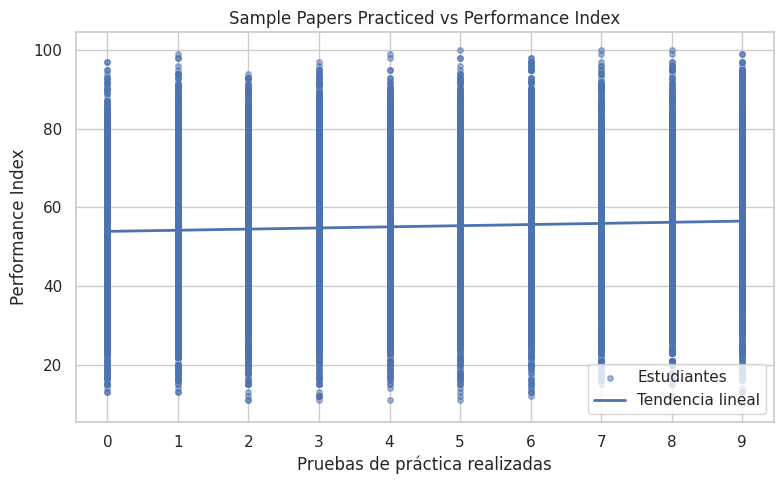

Correlación (Pearson) Sample Papers Practiced vs Performance Index: 0.043


In [163]:
# %%
# ---------- Dispersión: Sample Question Papers Practiced vs Performance Index ----------
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.5, s=16, label="Estudiantes")

# Recta de tendencia (ajuste lineal)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 200)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# Resaltar outliers en el scatter (si existieran)
if out_vals.size > 0:
    ax.scatter(x[out_mask], y[out_mask], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Sample Papers Practiced vs Performance Index")
ax.set_xlabel("Pruebas de práctica realizadas")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Correlación de apoyo (suele ser positiva moderada)
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlación (Pearson) Sample Papers Practiced vs Performance Index: {corr:.3f}")


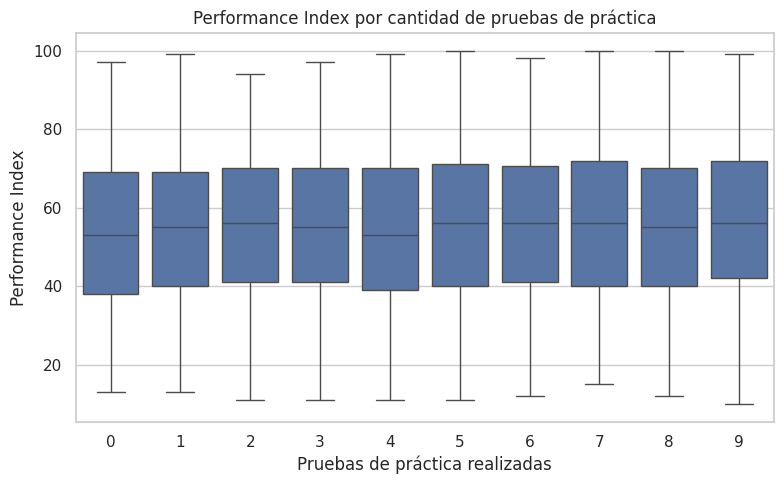

In [164]:
# %%
# ---------- Boxplot: rendimiento por cantidad de prácticas ----------
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=df[col].astype(int), y=y, ax=ax)
ax.set_title("Performance Index por cantidad de pruebas de práctica")
ax.set_xlabel("Pruebas de práctica realizadas")
ax.set_ylabel("Performance Index")
plt.tight_layout()
plt.show()


####  Distribución
- El histograma muestra cuántas **pruebas de práctica (0–9)** hizo cada estudiante.
- La mayoría se concentra entre **2 y 7 prácticas**.
- **Media ≈ 4.6** y **mediana ≈ 5** → hacer “unas cuantas” prácticas es lo más común.
- Tener **0 prácticas** no es raro (aparece con cierta frecuencia).

####  Outliers (IQR)
- Con **Q1 = 2**, **Q3 = 7** → **IQR = 5**.  
- Límites teóricos IQR: **[-5.5, 14.5]**, pero ajustando al rango real del dataset quedan en **[0, 9]**.  
-  **No se detectaron outliers** (no hay valores extraños fuera del rango observado).

####  Relación con el rendimiento
- En el scatter, cada punto es un estudiante: X = **prácticas**, Y = **Performance Index**.
- Se ve una **tendencia positiva muy suave**: quien practica más **tiende** a rendir un poco mejor.
- **Correlación ≈ 0.04** → la relación es **débil**: practicar ayuda, pero **no explica por sí sola** la nota.

####  Boxplot por cantidad de prácticas
- Las cajas para 0, 1, 2, …, 9 prácticas tienen **mucho solapamiento**.
- La **mediana del rendimiento sube ligeramente** con más prácticas, pero hay **gran variabilidad** en todos los grupos.

####  Resumen sencillo
- No hay valores extraños; la mayoría hizo entre 2 y 7 prácticas.
- Practicar más **ayuda un poquito**, pero la nota depende también de **otros hábitos** (estudiar horas, dormir bien, etc.).

###  Performance Index — Índice de rendimiento académico
**Qué veremos:**
- **Histograma:** cómo se distribuyen los puntajes (10–100).
- **Outliers (IQR):** detección automática con límites ajustados al rango real.
- **Boxplot:** resumen compacto de la mediana, cuartiles y posibles valores atípicos.

In [165]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
import numpy as np
import pandas as pd

def iqr_outliers_report(series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores observados (evita límites irreales)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f" Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


 Outliers IQR en 'Performance Index':
Q1=40.00, Q3=71.00, IQR=31.00
Umbrales teóricos: [-6.50, 117.50]
Umbrales ajustados al rango observado: [10.00, 100.00]
✅ No se detectaron outliers con IQR (ajustado).


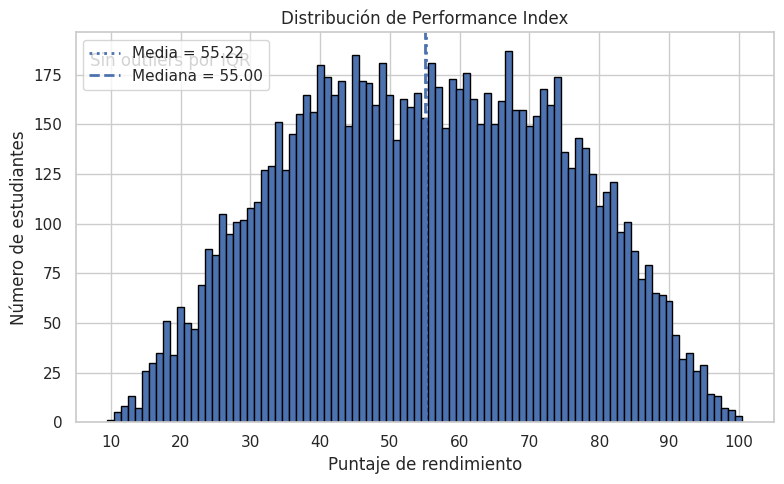

In [166]:
# %%
# ---------- Histograma de Performance Index con media/mediana y outliers ----------
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

col = "Performance Index"
x = df[col].astype(float)

# Detección IQR (ajustada)
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

# Bins “centrados” (en tu dataset: ~10..100)
xmin, xmax = int(np.floor(x.min())), int(np.ceil(x.max()))
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Performance Index")
ax.set_xlabel("Puntaje de rendimiento")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1, 10))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


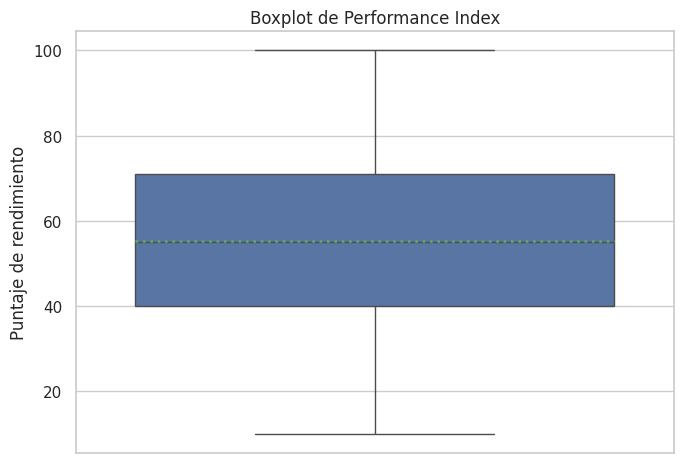

Resumen descriptivo de Performance Index:
                    count    mean       std      min   25%   50%   75%   max 
Performance Index  10000.0  55.2248  19.212558  10.0  40.0  55.0  71.0  100.0


In [167]:
# %%
# ---------- Boxplot de Performance Index ----------
fig, ax = plt.subplots(figsize=(7, 4.8))
sns.boxplot(y=x, ax=ax, showmeans=True,
            meanline=True, meanprops={"linestyle":":", "linewidth":2})
ax.set_title("Boxplot de Performance Index")
ax.set_ylabel("Puntaje de rendimiento")
plt.tight_layout()
plt.show()

# (Opcional) Resumen numérico rápido para la celda
print("Resumen descriptivo de Performance Index:")
print(x.describe(percentiles=[0.25, 0.5, 0.75]).to_frame().T)


####  Distribución
- El histograma tiene forma de **montañita** centrada cerca de **55 puntos**.
- La mayoría de los estudiantes está entre **40 y 71** (eso es el **rango intercuartílico**, donde vive el “grueso” de la clase).
- También vemos **algunos puntajes muy altos** (90–100) y **algunos bajos** (10–30), lo cual es normal en un grupo grande.

####  Outliers (IQR)
- Con **Q1 = 40**, **Q3 = 71** → **IQR = 31**.  
- Los límites IQR teóricos se ajustan al rango real **[10, 100]** del dataset.  
-  **No se detectaron outliers** (no hay valores raros fuera de lo esperado).

####  Boxplot
- La **mediana ≈ 55** (la mitad de la clase está por encima y la otra mitad por debajo).
- El “cajón” (40–71) muestra la zona donde está la mayoría.
- Los “bigotes” alcanzan aprox. **10** y **100**, indicando casos más bajos/altos, pero **dentro del rango permitido**.
- La variabilidad es **moderada** (desviación típica ≈ **19**).

####  Resumen sencillo
- La clase tiene un rendimiento **medio** (promedio ≈ **55**).
- Hay estudiantes que **destacan mucho** (cerca de **100**) y otros que **necesitan apoyo** (cerca de **10**).
- No hay valores extraños: la distribución es amplia pero **coherente** para un grupo grande.

### Correlación entre variables (heatmap + ranking vs Performance Index)
**Qué haremos:**
- Convertir `Extracurricular Activities` (Yes/No) a binaria (1/0) para poder correlacionar.
- Calcular la **matriz de correlación de Pearson** entre todas las variables numéricas.
- Visualizar con un **mapa de calor (heatmap)**.
- Mostrar un **ranking** (gráfico de barras) de la correlación de cada variable con **Performance Index**.


In [168]:
# 1) Preparación: codificar variable categórica y seleccionar columnas numéricas
df_corr = df.copy()

# Codificación binaria: Yes=1, No=0 (si ya existiera, se respeta)
if "Extracurricular (bin)" not in df_corr.columns:
    df_corr["Extracurricular (bin)"] = df_corr["Extracurricular Activities"].map({"Yes": 1, "No": 0})

num_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular (bin)",
    "Performance Index",
]

# 2) Matriz de correlación (Pearson)
corr = df_corr[num_cols].corr(method="pearson").round(3)

print("Matriz de correlación (Pearson):")
display(corr)


Matriz de correlación (Pearson):


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular (bin),Performance Index
Hours Studied,1.000,-0.012,0.001,0.017,0.004,0.374
Previous Scores,-0.012,1.000,0.006,0.008,0.008,0.915
Sleep Hours,0.001,0.006,1.000,0.004,-0.023,0.048
Sample Question Papers Practiced,0.017,0.008,0.004,1.000,0.013,0.043
Extracurricular (bin),0.004,0.008,-0.023,0.013,1.000,0.025
Performance Index,0.374,0.915,0.048,0.043,0.025,1.000


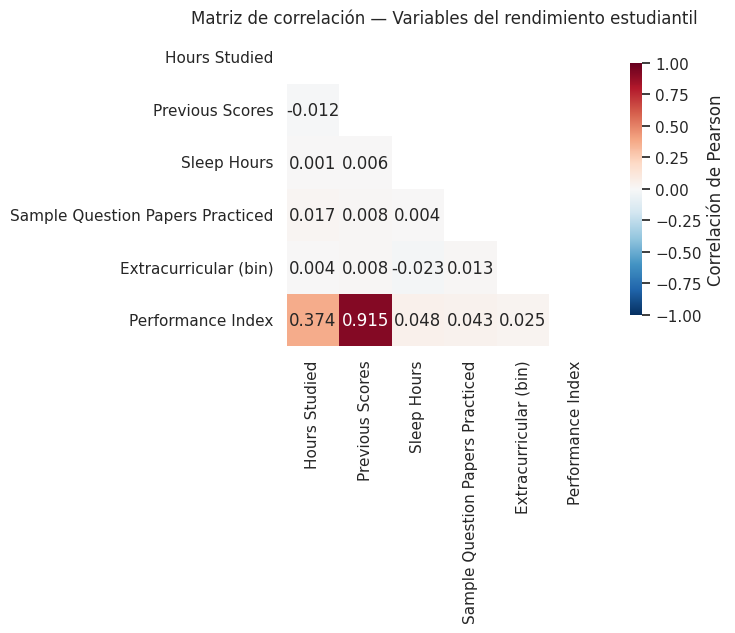

In [169]:
# 3) Heatmap (mapa de calor) con la mitad inferior para evitar duplicados
sns.set(style="white", font_scale=1.0)

# Máscara para la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,         # muestra el valor numérico
    fmt=".3f",
    cmap="RdBu_r",      # azul-negativo / rojo-positivo
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlación de Pearson"},
    ax=ax
)
ax.set_title("Matriz de correlación — Variables del rendimiento estudiantil")
plt.tight_layout()
plt.show()


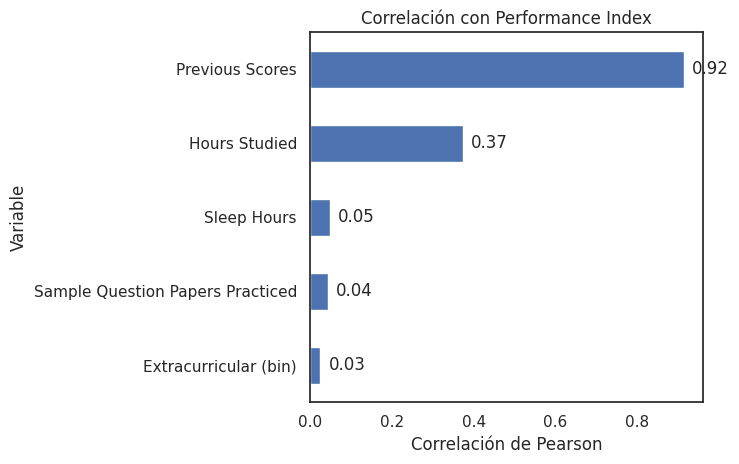

Correlaciones con Performance Index (de menor a mayor):


,Performance Index
Extracurricular (bin),0.025
Sample Question Papers Practiced,0.043
Sleep Hours,0.048
Hours Studied,0.374
Previous Scores,0.915


In [170]:
# 4) Ranking: correlación de cada variable con el Performance Index
target = "Performance Index"
corr_vs_target = (
    corr[target]
    .drop(target)        # quitamos la autocorrelación con el propio target
    .sort_values(ascending=True)
)

fig, ax = plt.subplots(figsize=(7.5, 4.8))
corr_vs_target.plot(kind="barh", ax=ax)
ax.set_title(f"Correlación con {target}")
ax.set_xlabel("Correlación de Pearson")
ax.set_ylabel("Variable")
for i, v in enumerate(corr_vs_target.values):
    ax.text(v + (0.02 if v >= 0 else -0.02), i, f"{v:.2f}",
            va="center", ha="left" if v >= 0 else "right")
plt.tight_layout()
plt.show()

print("Correlaciones con Performance Index (de menor a mayor):")
display(corr_vs_target.to_frame("corr").T if corr_vs_target.empty else corr_vs_target)


####  ¿Qué es la correlación?
Es un número entre **-1** y **1** que dice qué tan juntas cambian dos cosas:
- **+1**: cuando una sube, la otra también (muy conectadas).
- **0**: casi no están relacionadas.
- **-1**: cuando una sube, la otra baja.

En el **heatmap**, los colores más intensos (rojos/azules) marcan correlaciones más fuertes.  
En el **ranking**, vemos qué hábitos(variables) se relacionan más con la nota final (*Performance Index*).

####  Hallazgos clave de tu dataset
- **Previous Scores → Performance Index: r ≈ 0.92 (muy fuerte)**  
  Quien tenía **buenas notas antes** suele **rendir muy bien ahora**. Es el mejor predictor.
- **Hours Studied → Performance Index: r ≈ 0.37 (moderada)**  
  **Estudiar más** ayuda, aunque no explica todo.
- **Sleep Hours: r ≈ 0.05**, **Sample Papers Practiced: r ≈ 0.04**, **Extracurricular (bin): r ≈ 0.03**  
  Relaciones **muy débiles** con la nota en este dataset: dormir/practicar/actividades suman un poquito, pero **no determinan** el resultado.

####  Entre las variables entre sí
Las correlaciones entre hábitos (estudio, sueño, prácticas) son **cercanas a 0** → se comportan **casi independientes**.  
Ej.: *Hours Studied* vs *Previous Scores* ≈ **-0.01** (prácticamente nada).

####  Qué nos llevamos
- Para mejorar el rendimiento: **reforzar bases (Previous Scores)** y **aumentar horas de estudio efectivas**.  
- Dormir y practicar ayudan, pero su efecto es **pequeño** aquí.  
- Actividades extracurriculares son **neutras para la nota** (aunque pueden tener otros beneficios).

> Nota: **Correlación no es causalidad**. Solo mide relaciones **lineales**; otros factores no observados también pueden influir.


###  Limpieza: eliminación de duplicados exactos

Antes de dividir el dataset (random/stratified) vamos a **eliminar filas duplicadas exactas**  
(filas idénticas en **todas** las columnas, incluido el *Performance Index*).  
Esto evita **fuga de información**: si una copia cae en *train* y otra en *test*, el modelo habría “visto”  
ese ejemplo y las métricas quedarían artificialmente optimistas.

> Nota: **solo** eliminamos duplicados exactos.  
> Si existen filas con **el mismo vector de características** pero **distinto target**, no se borran;  
> eso no es un error sino **variabilidad/noise** y se maneja en la **división por grupos** (para que no se mezclen entre *train* y *test*).



In [171]:
# Contar y eliminar duplicados exactos (todas las columnas)
n_before = len(df)
dup_exact = df.duplicated().sum()
print(f"Filas totales antes: {n_before}")
print(f"Duplicados exactos detectados: {dup_exact}")

# Eliminación
df = df.drop_duplicates().reset_index(drop=True)

# Comprobaciones
n_after = len(df)
print(f"Tamaño tras deduplicar: {df.shape}")
print(f"Duplicados exactos restantes: {df.duplicated().sum()}")
print(f"Filas eliminadas: {n_before - n_after}")


Filas totales antes: 10000
Duplicados exactos detectados: 127
Tamaño tras deduplicar: (9873, 6)
Duplicados exactos restantes: 0
Filas eliminadas: 127


In [172]:
# %%
feature_cols = ["Hours Studied","Previous Scores","Sleep Hours",
                "Sample Question Papers Practiced","Extracurricular Activities"]

feat_dups = df.duplicated(subset=feature_cols, keep=False).sum()
print(f"Filas que comparten exactamente el mismo vector de features: {feat_dups}")
# Estas NO se eliminan aquí; se manejarán en el split por grupos.


Filas que comparten exactamente el mismo vector de features: 1312


### 🧽 Limpieza y transformación — Resumen corto

- **Estructura y tipos.** El dataset tiene **6 columnas**: **5 numéricas** y **1 categórica** (`Extracurricular Activities`).  
  Los tipos son correctos para el análisis.

- **Valores nulos.** **No hay** valores faltantes (`df.info()`), así que **no** fue necesario imputar nada.

- **Rangos válidos.** Todos los datos están dentro de lo esperable:  
  `Hours Studied 1–9`, `Previous Scores 40–99`, `Sleep Hours 4–9`,  
  `Sample Papers Practiced 0–9`, `Performance Index 10–100`,  
  `Extracurricular Activities: Yes/No`.

- **Outliers (IQR ajustado).** Revisamos las 5 columnas numéricas con el método IQR y, al
  ajustar los límites al rango real, **no se detectaron outliers** relevantes.  
  → No hicimos recortes ni transformaciones especiales.

- **Duplicados.**
  - **Eliminamos 127 filas duplicadas exactas** (idénticas en todas las columnas) para evitar “copias” del mismo caso.
  - Detectamos **1 312 filas** que **comparten exactamente el mismo vector de características** (mismo X) pero pueden tener
    **distinto `Performance Index`**. *No se eliminan*; se manejarán en la **división del dataset por grupos de features**
    (así no cae el mismo X en train y test y evitamos fuga de información).

- **Codificación categórica.** Para correlaciones/modelos creamos `Extracurricular (bin)`:
  `Yes → 1`, `No → 0`.

- **Consistencia de enteros.** Mantenemos como enteras las variables discretas
  (`Hours Studied`, `Sleep Hours`, `Sample Papers Practiced`) para graficar y contar correctamente.

- **Escalado.** Para el EDA no hace falta. Para **regresión con descenso del gradiente** puede ayudar **estandarizar**
  (media 0, desvío 1) las features numéricas para que el entrenamiento sea más estable.

**Conclusión.** Tras quitar duplicados exactos, el dataset queda **limpio y coherente**; no hay nulos ni outliers relevantes.
Añadimos la columna binaria de extracurriculares y **dividiremos por grupos de features** para evaluar el modelo sin fugas.


## 🧭 Guía para la **siguiente fase**: División del Dataset (70/15/15)

### 1) ¿Qué descubrimos y por qué importa?
- Ya **quitamos 127 filas duplicadas exactas**.
- Aún hay **1 312 filas** que **comparten exactamente el mismo vector de características**  
  (`Hours Studied`, `Previous Scores`, `Sleep Hours`, `Sample Question Papers Practiced`,
  `Extracurricular Activities`) pero pueden tener **distinto `Performance Index`**.
- Si un mismo **vector de features** aparece en *train* y *test*, hay **fuga de información**:  
  el modelo “ve” en entrenamiento lo mismo que luego evaluamos → métricas **infladas**.

👉 **Regla de oro:** en el **split** vamos a **mantener juntos** todos los registros que tengan el **mismo vector de features**  
(“mismo X”) y los enviaremos **completos** a un solo conjunto: *train*, *validación* o *test*.

---

### 2) Qué debes entregar (sin usar `train_test_split`)
Debes implementar **dos formas** de división, ambas **70% / 15% / 15%**:

1. **Muestreo aleatorio (Random Sampling)**  
   - Barajar **grupos de features** (no filas).  
   - Asignar 70% de los grupos a **train**, 15% a **validación**, 15% a **test**.

2. **Muestreo estratificado (Stratified Sampling)**  
   - Crear **estratos** del `Performance Index` (por ejemplo, **quartiles**).  
   - Dentro de **cada estrato**, barajar **grupos de features** y repartir 70/15/15.  
   - Así, *train/val/test* tienen **distribuciones de notas parecidas**.

Usa **solo NumPy y Pandas**. Fija una **semilla** (`seed`) para que todo sea **reproducible**.

---

### 3) Pasos claros (checklist)
- [ ] Construir un **id de grupo** para cada fila (mismo id ⇒ mismo vector de features).  
- [ ] **Random**: barajar ids únicos y cortar 70/15/15.  
- [ ] **Stratified**: binning del target (quartiles), asignar a cada **grupo** el estrato (moda), y dentro de cada estrato repartir 70/15/15.  
- [ ] **Verificar**:
  - Conjuntos **disjuntos** (ningún grupo repetido entre splits).
  - Proporciones 70/15/15 por **número de filas**.
  - En estratificado, que la **distribución de notas** en *train/val/test* sea parecida.  
- [ ] **Guardar** índices/CSV de cada split para reutilizar en la fase de modelado.
- [ ] En el modelado: estandarizar **solo con medias/desvíos de *train*** y aplicar a *val/test*.

---

### 4) Plantillas de código (solo NumPy/Pandas)

#### 4.1. Id de grupo por **vector de features**
```python
import numpy as np
import pandas as pd

feature_cols = ["Hours Studied","Previous Scores","Sleep Hours",
                "Sample Question Papers Practiced","Extracurricular Activities"]
target_col = "Performance Index"

# mismo id para filas con el MISMO vector de features
group_key = df[feature_cols].astype(str).agg("|".join, axis=1)
group_id, _ = pd.factorize(group_key)   # array de enteros: 0..G-1
